# Current state of the project:
* Business Understanding
    * Business objectives presented
    * Success Criteria presented
	* Business Requirements presented
	
* Data Understanding
	* Identified variables
	* Analyzed the distribution of the variables
	* Checked for missing data
	* Checked for outliers
	* Checked data correlation
	* Checked for imbalances in the target variable  
  
* Data Preparation
	* Imputed missing data
	* Removed outliers
	* Removed highly correlated variables
	* Balanced the target variable

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from scipy import stats

# Current state:

# 1. Business understanding:

In today's telecommunications world, retaining a customer is a challenge that needs to be addressed before they decide to switch operators. The issue of customer loss, also known as "churn," is significant, requiring modern strategies. The "Churn Prediction" project aims to understand how customer departures impact the overall business and how to predict who might be next on the list of potential churners.

Losing customers is not just a loss of current revenue; it also means missing opportunities for future benefits from new services or development. Each customer is a valuable asset, and understanding their needs and expectations is crucial for industry strategy. Hence, predictive systems based on modern technologies are being developed. Data analysis helps identify patterns and signals that may indicate a customer is considering changing service providers.

In the context of the customer churn prediction project in the telecommunications industry, our focus is on a deep understanding of the industry context, which is crucial for an effective strategy. Objectives include not only analyzing the problem but also actively managing customer retention. This is directed towards specific business goals, such as reducing the customer churn rate or increasing overall retention. Additionally, ensuring access to historical customer data is crucial. Such an approach allows for better understanding of the problem and more effective action to maintain competitiveness and stable growth in the dynamic telecommunications industry.

We utilize the CRISP-DM model, enabling an organized approach to the data analysis process, from understanding the business context to implementing effective retention strategies. The CRISP-DM (Cross-Industry Standard Process for Data Mining) model provides a framework that contributes to systematic progress and achieving success in data analysis projects. Our priorities include:

* Business Objectives:

    * Understanding the impact of customer churn on revenues and retention efforts.
    * Developing predictive systems to foresee potential departures.
    * Implementing targeted campaigns to retain customers.

* Success Criteria:

    * Reduction of the customer churn rate by a specified percentage.
    * Increase in customer retention and overall revenues.

* Business Requirements:

    * Access to historical customer data.
    * Collaboration with the marketing and customer service teams during campaign 



# 2. Data Understanding

Looking at the raw data, we can categorize the variables into different types based on their nature:

1. Interval-Scaled Variables:

    * ACCOUNTLENGTH
    * NUMBERVMAILMESSAGES (Number of Voicemail Messages)
    * TOTALDAYMINUTES
    * TOTALDAYCALLS 
    * TOTALDAYCHARGE
    * TOTALEVEMINUTES (Total Evening Minutes)
    * TOTALEVECALLS (Total Evening Calls)
    * TOTALEVECHARGE (Total Evening Charge)
    * TOTALNIGHTMINUTES
    * TOTAL NIGHT CALLS
    * TOTAL NIGHT CHARGE
    * TOTAL INTL MINUTES (Total International Minutes)
    * TOTAL INTL CALLS (Total International Calls)
    * TOTAL INTL CHARGE (Total International Charge)
    * CUSTOMER SERVICE CALLS

2. Binary Variables:

    * INTERNATIONALPLAN
    * VOICEMAILPLAN
    * CHURN


In [2]:
df = pd.read_csv("./../churn_data.csv")
numerical_columns = df.select_dtypes(include=['float64']).columns
df.describe(include='all')

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
count,5000,4951.000000,4950,4950,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000
unique,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,No,NaN,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4293,NaN,4481,3638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,100.238295,NaN,NaN,7.763636,180.306625,100.038788,30.629386,200.679798,100.243838,17.048293,200.465697,99.932929,9.015240,10.259010,4.432525,2.772088,1.569091
std,NaN,39.718817,NaN,NaN,13.552928,53.926625,19.844529,9.148881,50.486434,19.837380,4.300503,50.498290,19.939450,2.276812,2.763712,2.448457,0.744552,1.305279
min,NaN,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,73.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.425000,87.000000,14.130000,167.000000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,NaN,100.000000,NaN,NaN,0.000000,180.100000,100.000000,30.600000,201.000000,101.000000,17.090000,200.550000,100.000000,9.010000,10.300000,4.000000,2.780000,1.000000
75%,NaN,127.000000,NaN,NaN,17.000000,216.200000,113.000000,36.720000,234.100000,114.000000,19.897500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000


/tmp/ipykernel_13115/1806405657.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


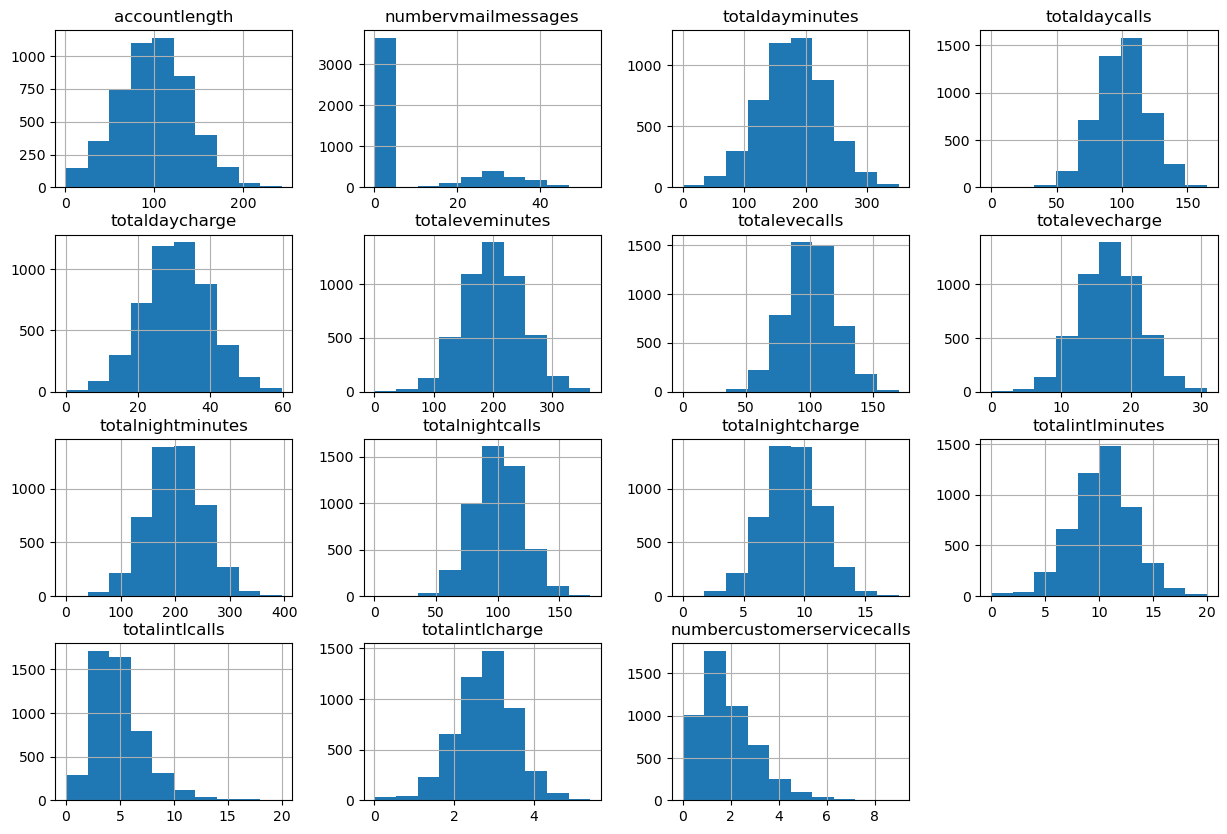

In [3]:
# Histogram for each continuous variable
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

Analyzing the histogram of the numerical varaibles we can see that most of them follow an almost normal distribution.

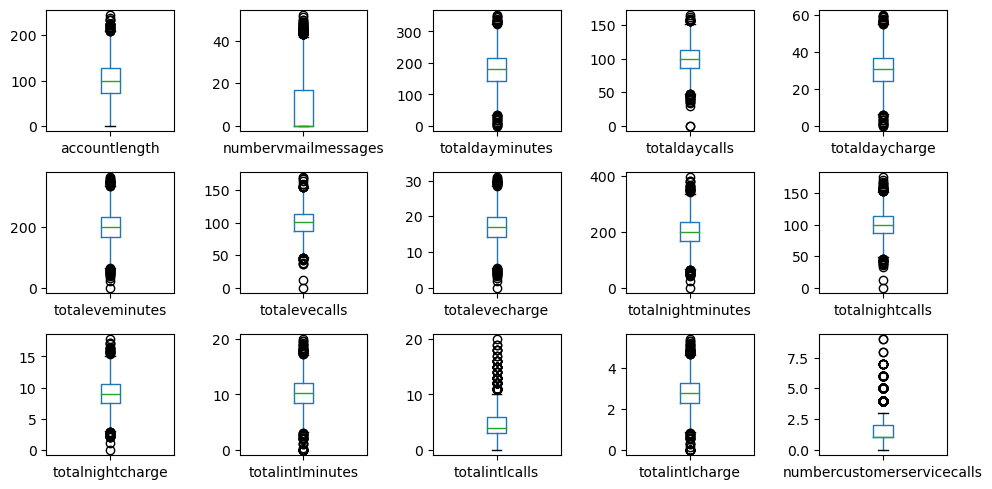

In [4]:
# Boxplots for each continuous variable
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(10, 5))  
numerical_columns = df.select_dtypes(include=['float64']).columns
for i in range(len(numerical_columns)):
    df.boxplot(column=numerical_columns[i], ax=axes[i//5, i%5], grid=False)
plt.tight_layout()
plt.show()

Further analysis of outliers will be necessary.

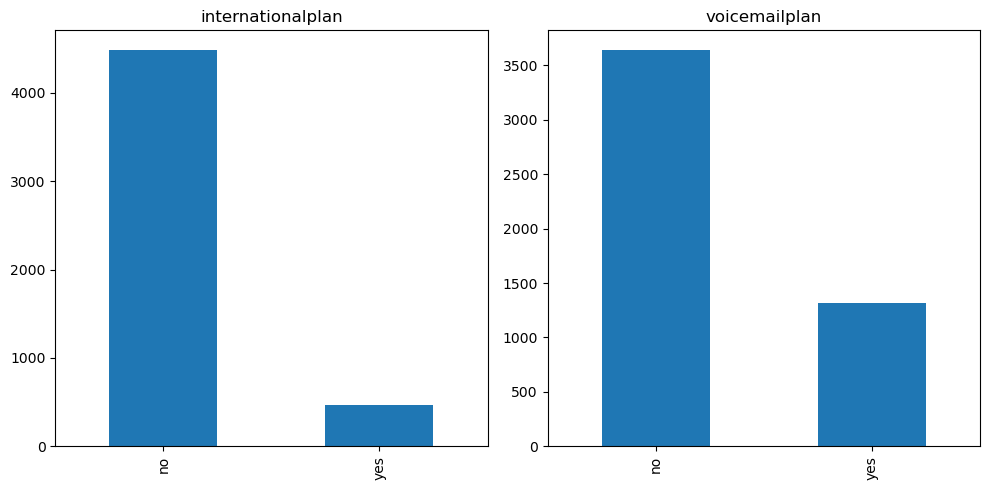

In [5]:
# Barplots for the explanatory binary variables
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
df['internationalplan'].value_counts().plot.bar(ax=axes[0])
axes[0].set_title('internationalplan')
df['voicemailplan'].value_counts().plot.bar(ax=axes[1])
axes[1].set_title('voicemailplan')
plt.tight_layout()
plt.show()

The explanatory binary variables are unbalanced.

# Outliers

In [6]:
numerical_columns = df.select_dtypes(include=['float64']).columns
z_scores = stats.zscore(df.loc[:,numerical_columns])
threshold = 3  # Adjustable threshold

# Find indices of outliers
outlier_indices = (abs(z_scores) > threshold).any(axis=1)

print(f"Number of rows with outliers: {np.sum(outlier_indices)}")
print(f"percentage of rows with outliers: {np.sum(outlier_indices)/len(df)}")


Number of rows with outliers: 0
percentage of rows with outliers: 0.0


As we have a small number of rows with outliers we decided to drop those rows.

In [7]:
df = df[~outlier_indices]
df.describe()

,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
count,4951.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000
mean,100.238295,7.763636,180.306625,100.038788,30.629386,200.679798,100.243838,17.048293,200.465697,99.932929,9.015240,10.259010,4.432525,2.772088,1.569091
std,39.718817,13.552928,53.926625,19.844529,9.148881,50.486434,19.837380,4.300503,50.498290,19.939450,2.276812,2.763712,2.448457,0.744552,1.305279
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.700000,87.000000,24.430000,166.425000,87.000000,14.130000,167.000000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.100000,100.000000,30.600000,201.000000,101.000000,17.090000,200.550000,100.000000,9.010000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,17.000000,216.200000,113.000000,36.720000,234.100000,114.000000,19.897500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# Missing data

In [8]:
mv = np.where(pd.isnull(df))
print(f"rows with missing values: {len(np.unique(mv[0]))}\ntotal number of rows: {len(df)}")
print(f"percenteg of rows with missing values: {len(np.unique(mv[0]))/len(df)}")

rows with missing values: 793
total number of rows: 5000
percenteg of rows with missing values: 0.1586


We can see that there is a significant amount of missing data in the dataframe. We will implement multiple options to deal with missing data, including:

    1. Dropping the rows with missing values;

    2. Data imputation using the average or the most frequent value;

    3. Data imputation using kNN.

Since we have a lot of missing data, dropping rows would not be an effective solution. Some of the attributes are left/right skewed, therefore imputing the average value might affect the distributions. We considered kNN as the most effective solution in this case, although we might reconsider after evaluating of the models.

In [9]:
# data imputation using average values
def avgImputer():
    numerical_cols = df.select_dtypes(include='number')
    imputer = SimpleImputer(strategy='mean')
    df[numerical_cols.columns] = imputer.fit_transform(numerical_cols)

    categorical_cols = df.select_dtypes(exclude='number')
    imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_cols.columns] = imputer.fit_transform(categorical_cols)

# dropping missing values
def dropValues():
    df = df.dropna()

# data imputation using knn
def knnImputer():
    numerical_cols = df.select_dtypes(include='number')
    imputer = KNNImputer(n_neighbors=2)
    df[numerical_cols.columns] = imputer.fit_transform(numerical_cols)

    categorical_cols = df.select_dtypes(exclude='number')
    imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_cols.columns] = imputer.fit_transform(categorical_cols)


knnImputer()

df.describe(include='all')

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
count,5000,5000.000000,5000,5000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
unique,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,No,NaN,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4293,NaN,4531,3688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,100.226660,NaN,NaN,7.77070,180.333678,100.033400,30.643167,200.633490,100.243400,17.054053,200.463720,99.908000,9.017409,10.265140,4.427800,2.772073,1.568800
std,NaN,39.651528,NaN,NaN,13.53024,53.790111,19.798611,9.152495,50.344162,19.792438,4.293719,50.339301,19.890587,2.272583,2.757769,2.440303,0.742526,1.301117
min,NaN,1.000000,NaN,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,73.000000,NaN,NaN,0.00000,143.700000,87.000000,24.430000,166.600000,87.000000,14.147500,167.100000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,NaN,100.000000,NaN,NaN,0.00000,180.100000,100.000000,30.600000,201.000000,100.000000,17.090000,200.500000,100.000000,9.015000,10.300000,4.000000,2.780000,1.000000
75%,NaN,127.000000,NaN,NaN,17.00000,216.025000,113.000000,36.750000,234.000000,114.000000,19.900000,234.525000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000


# Data correlation

Now we will take a look at the correlation of the variables with each other and with our target variable.

<AxesSubplot:>

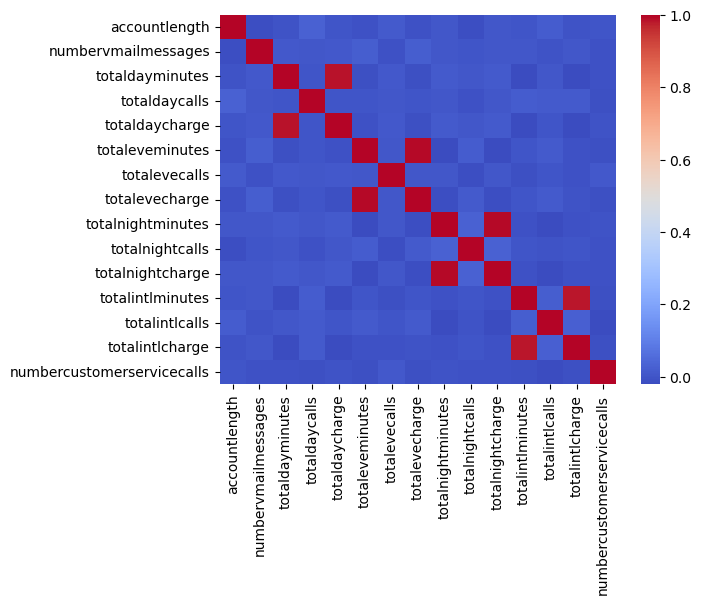

In [10]:
numerical_columns = df.select_dtypes(include=['float64']).columns
string_columns = df.select_dtypes(exclude=['float64']).columns
corr_matrix =  df.loc[:,numerical_columns].corr()
sns.heatmap(corr_matrix, cmap='coolwarm')

As we can see there is some variables with a high correlation with each other:
* totaldayminutes-totaldaycharge
* totalevecharge-totaleveminutes
* totalnightcharge-totalnightminutes
* totalintlcharge-totalintlminutes

To each of this pair of variables we will analyze the correlation with the target variable and drop the variable with the least correlation in order to not have repeated data in our analysis.

In [11]:
corr = {}

for col in string_columns:

    contingency_table = pd.crosstab(df['churn'], df[col])

    chi2, p, _, _ = stats.chi2_contingency(contingency_table)
    corr[col] = p

churn = df['churn'].map({
    'Yes': 0,
    'No' : 1
})


for col in numerical_columns:

    correlation, p = stats.pointbiserialr(df[col], churn)
    corr[col] = p


vars = [('totaldayminutes','totaldaycharge'),('totalevecharge','totaleveminutes'),('totalnightcharge','totalnightminutes'),('totalintlcharge','totalintlminutes')]

for var in vars:
    if corr[var[0]] < corr[var[1]]:
        df = df.drop([var[0]], axis=1)
    else : 
        df = df.drop([var[1]], axis=1)

df.describe(include='all')

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalintlcalls,totalintlcharge,numbercustomerservicecalls
count,5000,5000.000000,5000,5000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
unique,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,No,NaN,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4293,NaN,4531,3688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,100.226660,NaN,NaN,7.77070,180.333678,100.033400,100.243400,17.054053,200.463720,99.908000,4.427800,2.772073,1.568800
std,NaN,39.651528,NaN,NaN,13.53024,53.790111,19.798611,19.792438,4.293719,50.339301,19.890587,2.440303,0.742526,1.301117
min,NaN,1.000000,NaN,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,73.000000,NaN,NaN,0.00000,143.700000,87.000000,87.000000,14.147500,167.100000,87.000000,3.000000,2.300000,1.000000
50%,NaN,100.000000,NaN,NaN,0.00000,180.100000,100.000000,100.000000,17.090000,200.500000,100.000000,4.000000,2.780000,1.000000
75%,NaN,127.000000,NaN,NaN,17.00000,216.025000,113.000000,114.000000,19.900000,234.525000,113.000000,6.000000,3.240000,2.000000


# Data scaling
Some models work better if our data is all in the same scales so in this step we will scale our data.

In [12]:
numerical_columns = df.select_dtypes(include=['float64']).columns

minMaxScaler = MinMaxScaler()
minMaxScaler.fit(df.loc[:,numerical_columns])
df.loc[:,numerical_columns] = minMaxScaler.transform(df.loc[:,numerical_columns])

df.describe()

,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalintlcalls,totalintlcharge,numbercustomerservicecalls
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.410028,0.149437,0.513040,0.606263,0.589667,0.551733,0.507503,0.570903,0.221390,0.513347,0.174311
std,0.163849,0.260197,0.153030,0.119992,0.116426,0.138910,0.127441,0.113660,0.122015,0.137505,0.144569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.297521,0.000000,0.408819,0.527273,0.511765,0.457700,0.423038,0.497143,0.150000,0.425926,0.111111
50%,0.409091,0.000000,0.512376,0.606061,0.588235,0.552896,0.507595,0.571429,0.200000,0.514815,0.111111
75%,0.520661,0.326923,0.614580,0.684848,0.670588,0.643805,0.593734,0.645714,0.300000,0.600000,0.222222
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data splitting
Here we split ou data into train and test data to be used on our models

In [13]:
numerical_columns = df.select_dtypes(include=['float64']).columns

x = df[numerical_columns]
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Binary varaibles
In order to be used in some models we need all variables to be numerical so we will transform our binary variables in numerical data.

In [14]:
df['internationalplan'] = df['internationalplan'].map({
    'yes': 0,
    'no' : 1
})

df['voicemailplan'] = df['voicemailplan'].map({
    'yes': 0,
    'no' : 1
})

# Handling Imbalanced Data

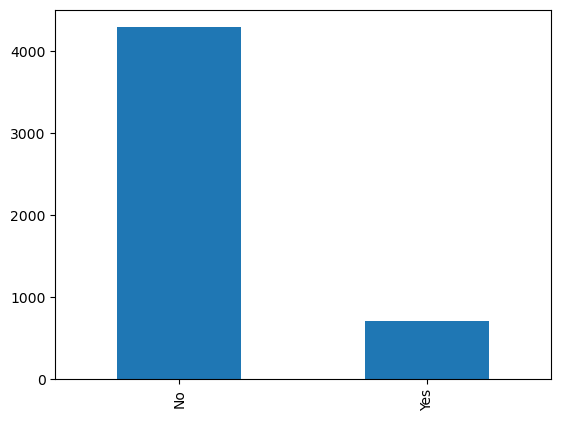

No     4293
Yes     707
Name: churn, dtype: int64

In [15]:
df['churn'].value_counts().plot.bar()
plt.show()

df['churn'].value_counts()

As we can see we have a higly unbalanced target variable.

Some models work better when our target variables have a similar number of cases in each class, in order to transform our data to get that scenario we thought of two approaches: over-sampling our data and under-sampling our data. In the code bellow we have both implementations, later we will analyze wich one gives us the best results for our models.

In [16]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Display class distribution after oversampling
print("\nClass distribution after oversampling:")
print(pd.Series(y_resampled).value_counts())

# Apply RandomUnderSampler to address class imbalance
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Display class distribution after undersampling
print("\nClass distribution after undersampling:")
print(pd.Series(y_resampled).value_counts())


Class distribution after oversampling:
No     3432
Yes    3432
Name: churn, dtype: int64

Class distribution after undersampling:
No     568
Yes    568
Name: churn, dtype: int64


# TO DO:

We have already started implementing the models, but we have not yet compared them and selected the best one, which is why this part has not been included here at all.